In [1]:
import numpy as np
import pandas as pd

import nltk   #for adding extra columns

nltk.download('punkt') #for downloading dependencies

import seaborn as sns

nltk.download('stopwords')
from nltk.corpus import stopwords

import string 

from nltk.stem.porter import PorterStemmer
# ps= PorterStemmer()

!pip install wordcloud
!pip install xgboost

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1749,ham,DO NOT B LATE LOVE MUM,NaN,NaN,NaN
4490,ham,"My friend, she's studying at warwick, we've pl...",NaN,NaN,NaN
3285,ham,Not to worry. I'm sure you'll get it.,NaN,NaN,NaN
796,spam,"Orange customer, you may now claim your FREE C...",NaN,NaN,NaN
1369,ham,Did you try making another butt.,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# DROP
df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace=True)

In [12]:
df.sample(5)

,v1,v2
707,ham,Quite late lar... Ard 12 anyway i wun b drivin...
2085,ham,Moji i love you more than words. Have a rich day
2024,ham,U having lunch alone? I now so bored...
4161,ham,How's it going? Got any exciting karaoke type ...
3104,ham,Or remind me in a few hrs.


In [14]:
# RENAME
df.rename(columns={'v1':'target' , 'v2':'text'}, inplace=True)

In [16]:
df.sample(5)

,target,text
4458,spam,Welcome to UK-mobile-date this msg is FREE giv...
583,ham,my ex-wife was not able to have kids. Do you w...
3050,ham,Awesome question with a cute answer: Someone a...
4835,ham,Yay can't wait to party together!
4982,ham,Networking job is there.


In [18]:
# APPLY LABEL ENCODER for column target
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder() 

In [20]:
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,text
3627,0,Meeting u is my work. . . Tel me when shall i ...
2383,0,Your pussy is perfect!
1902,0,My sister got placed in birla soft da:-)
2893,0,K...k...yesterday i was in cbe .
5388,0,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!


In [22]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
# duplicate values
df.duplicated().sum()

403

In [26]:
# remove duplicatesd
df=df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [30]:
df.shape

(5169, 2)

## 2. EDA

In [33]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2bbed9e7ef0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

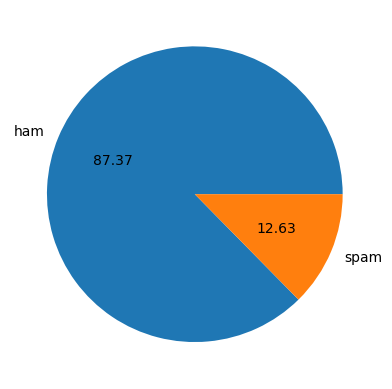

In [35]:
# for better representation 
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')

In [37]:
#data imbalance

In [39]:
# import nltk      #for adding extra columns

In [41]:
# nltk.download('punkt') #for downloading dependencies

In [43]:
#add extra column which is 'num_character' to count each character in each text(mail)
df['num_characters']=df['text'].apply(len)
df.sample(5)

,target,text,num_characters
5030,0,Hey... Very inconvenient for your sis a not huh?,48
4424,0,Just now saw your message.it k da:),35
2492,0,No drama Pls.i have had enough from you and fa...,245
4410,0,Ya but it cant display internal subs so i gott...,60
988,0,Yun ah.the ubi one say if Ì_ wan call by tomor...,162


In [45]:
# add another extra column "num_words"
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words
217,0,Easy ah?sen got selected means its good..,41,10
659,1,88800 and 89034 are premium phone services cal...,59,9
3959,0,I sent lanre fakeye's Eckankar details to the ...,54,11
3050,0,Awesome question with a cute answer: Someone a...,135,39
3544,0,Thank You meet you monday,25,5


In [46]:
# num_sentence
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words,num_sentences
4083,0,Quite ok but a bit ex... U better go eat smth ...,74,19,1
4414,0,"Yeah I should be able to, I'll text you when I...",65,18,1
1793,0,You bad girl. I can still remember them,39,9,2
2061,0,Hey ! I want you ! I crave you ! I miss you ! ...,96,27,6
4824,0,I am going to sleep. I am tired of travel.,42,12,2


In [47]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [49]:
# ham and spam messages are analysis different 

In [53]:
# for ham messages
df[df['target'] ==0][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [55]:
# for spam messages
df[df['target'] ==1][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

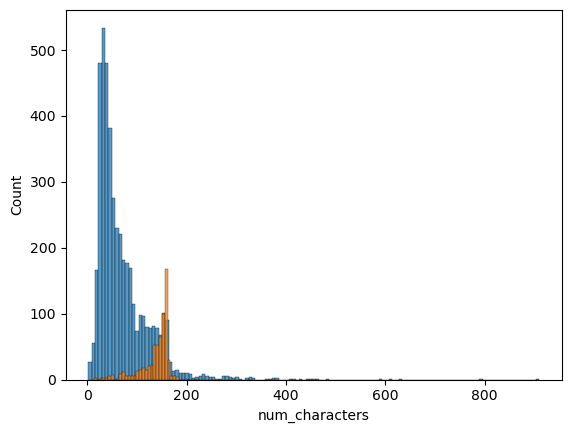

In [57]:
# in deep we can represent this in (histogram)plot way
# import seaborn as sns
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

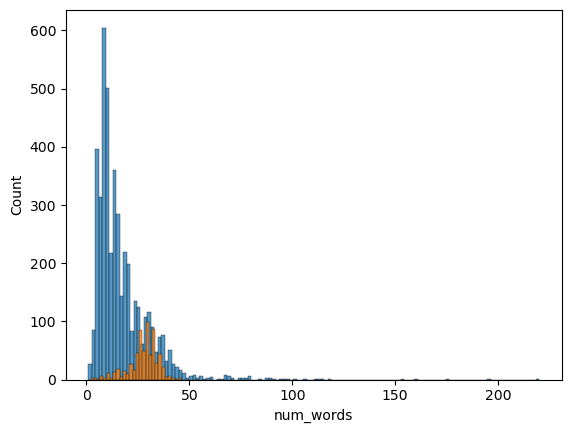

In [58]:
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

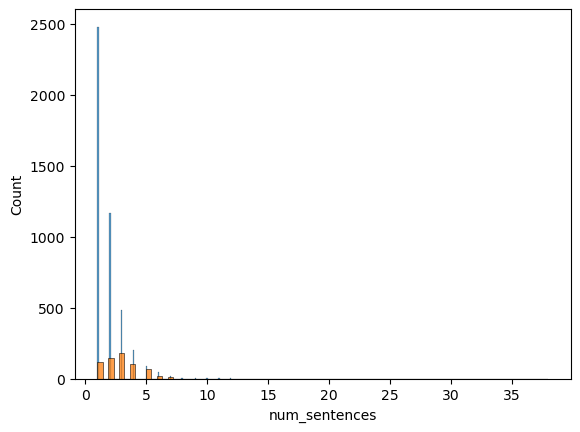

In [60]:
sns.histplot(df[df['target'] ==0]['num_sentences'])
sns.histplot(df[df['target'] ==1]['num_sentences'])

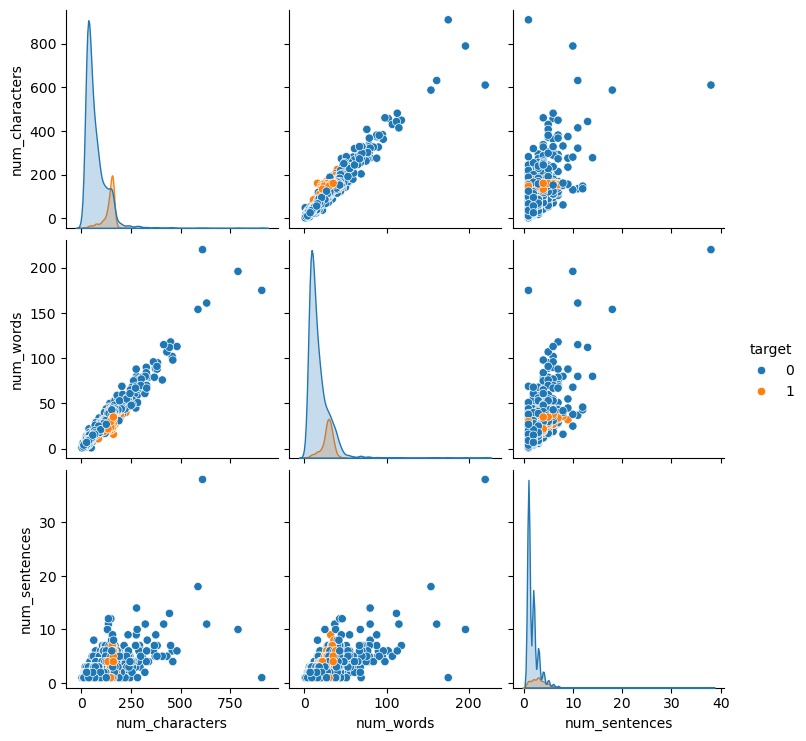

In [62]:
# correlation between 'num_words','num_characters' and 'num_sentences'
sns.pairplot(df,hue='target')

In [64]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)


                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


<Axes: >

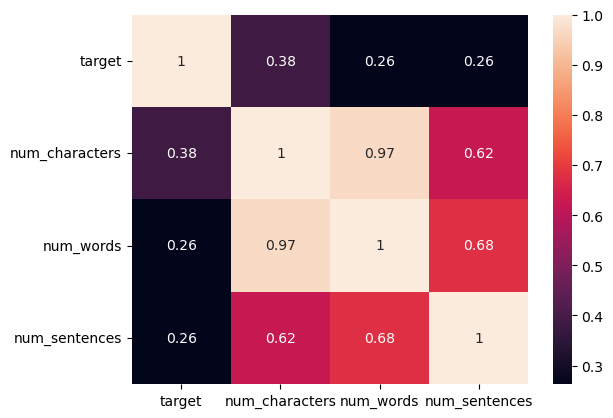

In [65]:
sns.heatmap(numeric_df .corr(),annot=True)

## 3.TEXT PREPROCESSING

In [70]:
def transform_text(text):
    # Lower case
    text=text.lower()
    # Tokenization
    text=nltk.word_tokenize(text)
    # Removing special character
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    # Removing stop words and punchuation
    text = y[:] #cuz y is a list(mutable data type)
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    #stemming
    test=y[:]
    y.clear()
    for i in test:
        ps= PorterStemmer()
        y.append(ps.stem(i))
    return " ".join(y)

In [72]:
transform_text("But i'll b going 2 sch on mon. My sis need 2 take smth.")

'b go 2 sch mon si need 2 take smth'

In [74]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [76]:
# # stop words
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords.words('english')

In [78]:
# import string 
# string.punctuation

In [80]:
# from nltk.stem.porter import PorterStemmer
# ps= PorterStemmer()
# ps.stem('practicing')

In [82]:
df['transformed_text']=df['text'].apply(transform_text)

In [83]:
df['transformed_text'].sample(5)

1649                                          laptop take
4286    wud never mind u dont miss u dont need u wil r...
732           lol wo feel bad use money take steak dinner
3840                               howz come said medicin
1567                                whatev im pretti piss
Name: transformed_text, dtype: object

In [84]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
3709,0,ARE YOU IN TOWN? THIS IS V. IMPORTANT,37,9,2,town import
1767,0,"K, want us to come by now?",26,9,1,k want us come
3209,0,"She said,'' do u mind if I go into the bedroom...",145,43,3,said u mind go bedroom minut ok sed sexi mood ...
3356,0,"Brainless Baby Doll..:-D;-), vehicle sariyag d...",67,16,1,brainless babi doll vehicl sariyag drive madok...
695,0,Good. Good job. I like entrepreneurs,36,8,3,good good job like entrepreneur


In [85]:
# Gentrate word cloud(means heighlights the important words) for spam messages
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500,min_font_size=00,background_color='red')

In [86]:
spam_wc=wc.generate(df[df['target']== 1] ['transformed_text'].str.cat(sep=' '))

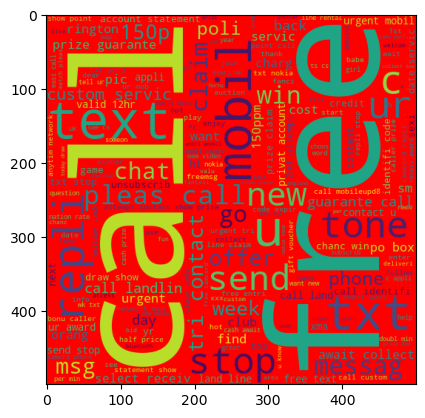

In [87]:
# plt.figure(figsize=(12,10))
plt.imshow(spam_wc)

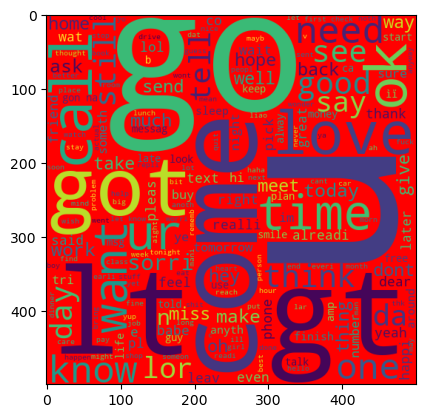

In [88]:
ham_wc=wc.generate(df[df['target']== 0] ['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [89]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
506,0,"Maybe westshore or hyde park village, the plac...",62,13,1,mayb westshor hyde park villag place near hous
4410,0,Ya but it cant display internal subs so i gott...,60,13,1,ya cant display intern sub got ta extract
3026,0,You still at the game?,22,6,1,still game
1957,0,Take something for pain. If it moves however t...,87,20,2,take someth pain move howev side next 6hr see ...
4293,1,Kit Strip - you have been billed 150p. Netcoll...,74,16,2,kit strip bill 150p netcollex po box 1013 ig11...


In [90]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [91]:
# Top common 30 words in spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [92]:
len(spam_corpus)

9939

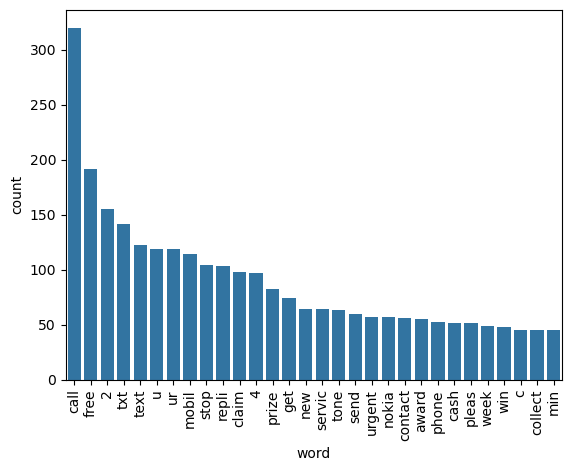

In [93]:
from collections import Counter
spam_counter=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count'])
sns.barplot(x='word',y='count',data=spam_counter)
plt.xticks(rotation='vertical')
plt.show()

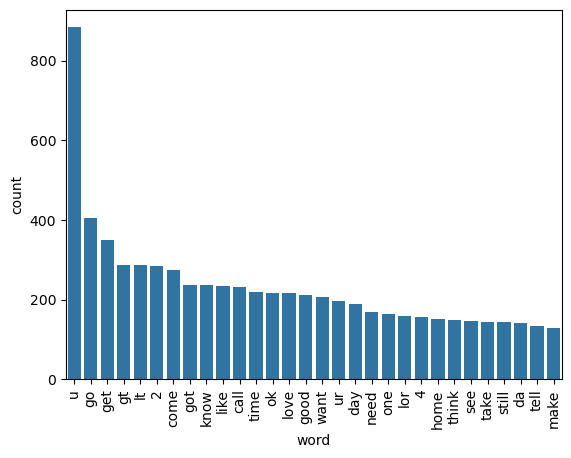

In [94]:
# Top common 30 words in ham
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

ham_counter=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])
sns.barplot(x='word',y='count',data=ham_counter)
plt.xticks(rotation='vertical')
plt.show()

# 4.MODEL BUILDING

In [223]:
# convert the data into vactorize using (bag of words)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [225]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [227]:
X.shape

(5169, 3000)

In [229]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [231]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [164]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [233]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [168]:
## Gaussian Naive bayes
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [235]:
## Multinomial Naive bayes
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [172]:
## bernoullis Naive bayes
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [175]:
## try with other models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [179]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [181]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [183]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

## 5.EVAULATION

In [184]:
accuracy_scores= []
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print(f"For {name}:")
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {current_precision}")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC:
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
For KN:
Accuracy: 0.9052224371373307
Precision: 1.0
For NB:
Accuracy: 0.9709864603481625
Precision: 1.0
For DT:
Accuracy: 0.9323017408123792
Precision: 0.8333333333333334
For LR:
Accuracy: 0.9584139264990329
Precision: 0.9702970297029703
For RF:
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829


C:\Users\chala\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost:
Accuracy: 0.960348162475822
Precision: 0.9292035398230089
For BgC:
Accuracy: 0.9584139264990329
Precision: 0.8682170542635659
For ETC:
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406
For GBDT:
Accuracy: 0.9468085106382979
Precision: 0.9191919191919192
For xgb:
Accuracy: 0.9671179883945842
Precision: 0.9262295081967213


In [187]:
# Create the performance DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # Convert dictionary keys to a list
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision',ascending=False)

In [189]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [191]:
# Melt the DataFrame to long format
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


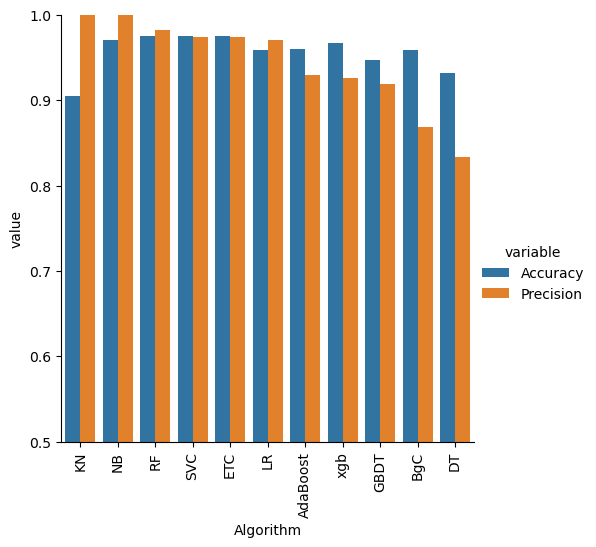

In [193]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 6.IMPROVEMENT 

In [195]:
# model improve
# 1. Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [203]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [199]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [201]:
# new_df = performance_df.merge(temp_df,on='Algorithm')

In [492]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [494]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [205]:
# new_df_scaled.merge(temp_df,on='Algorithm')

In [207]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [209]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [211]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [213]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [215]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [217]:
from sklearn.ensemble import StackingClassifier

In [219]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [221]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [237]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))